Develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

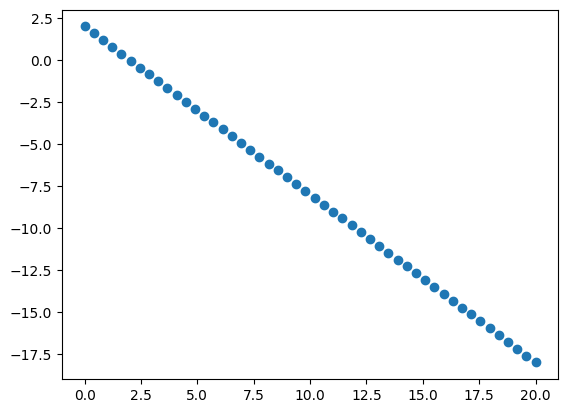

In [4]:
plt.scatter(X,y)

#### Use final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [5]:
def single_variable_GD(x,y,learning_rate,iterations):
    thetas_0 = []
    thetas_1 = []
    loss = []
    h_xs = []

    theta_0 = 0
    theta_1 = 0
    for i in range(iterations):
        h_x = theta_0 + theta_1 * x
        error = h_x - y
        j = 1/(2*len(x)) * np.sum(error**2)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        loss.append(j)
        h_xs.append(h_x)
        d_theta_0 = (1/len(x)) * np.sum(error)
        d_theta_1 = (1/len(x)) * np.sum(error * x)
        gradient_vector = np.array([[d_theta_0],[d_theta_1]])
        print("****************** Iteration ",i,"******************")
        print("h(x):",h_x,"\n")
        print("Error Vector:\n",error)
        print("j =",j,"\n")
        print("Gradient Vector:\n",gradient_vector,"\n")
        print("Gradiant Vector Norm:\n",np.linalg.norm(gradient_vector),"\n")
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)
        
        if (np.linalg.norm(gradient_vector) < 0.001 or abs(loss[i-1]-j) < 0.001) and i != 0:
            print("****************** Training Report ******************\n")
            print("Gradient Descent converged after ",i," epochs\n")
            print("theta_0_Opt:",theta_0)
            print("theta_1_Opt:",theta_1,"\n")
            print("Error Vector:\n",error)
            print("Cost = ",j,"\n")
            print("h(x) = y_predict:\n",h_x,"\n")
            print("y_actual:",y,"\n")
            return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x
        
        theta_0 = theta_0 - learning_rate * d_theta_0
        theta_1 = theta_1 - learning_rate * d_theta_1
    return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x

#### Try function with any input parameterss.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [6]:
thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x =  single_variable_GD(X,y,0.0005,300)

****************** Iteration  0 ******************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
j = 49.34693877551021 

Gradient Vector:
 [[  8.        ]
 [114.69387755]] 

Gradiant Vector Norm:
 114.97254258164628 

theta_0_new: 0
theta_1_new: 0
************

In [7]:
print("r2_score:",r2_score(y,h_x))

r2_score: 0.9686158031920962


In [8]:
def loss_plot(loss,color):
    plt.plot(loss,marker='o',color=color)
    plt.grid(True)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

def theta_plot(thetas,loss,number,r,color):
    plt.plot(thetas,loss,marker='o',color=color)
    plt.grid(True)
    plt.title(f"Learning Rate = {r}")
    plt.ylabel("Loss")
    plt.xlabel(f"Theta {number}")
    plt.show()

def converge_lines(x,y,h_xs,point_color,line_color):
    plt.scatter(x,y,color=point_color,s=10)
    for i in range(len(h_xs)):
        plt.plot(x,h_xs[i],color=line_color)
        plt.grid(True)
        plt.xlabel("X")
        plt.ylabel("Y")
    plt.show()

def regression_line(x,y,h_x,point_color,line_color):
    plt.scatter(x,y,color=point_color,s=10)
    plt.plot(x,h_x,color=line_color)
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

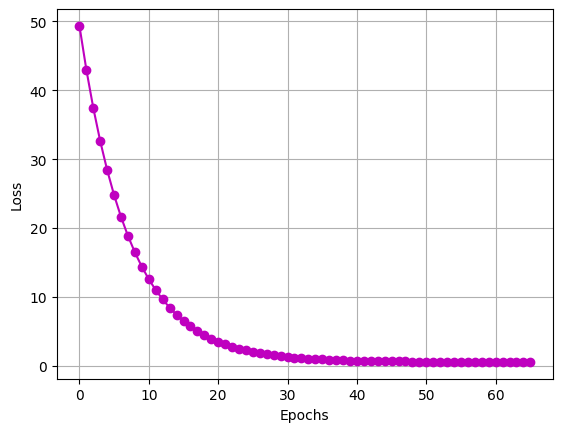

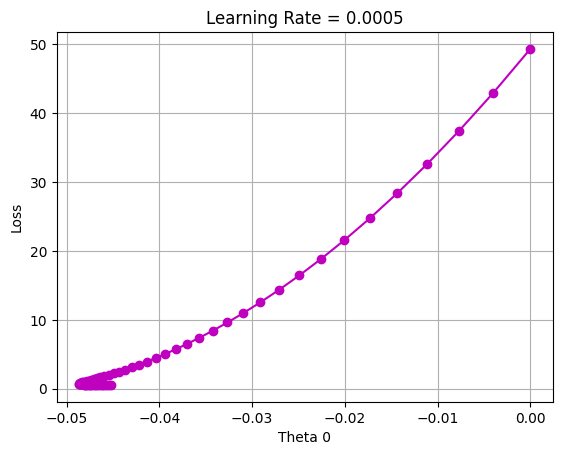

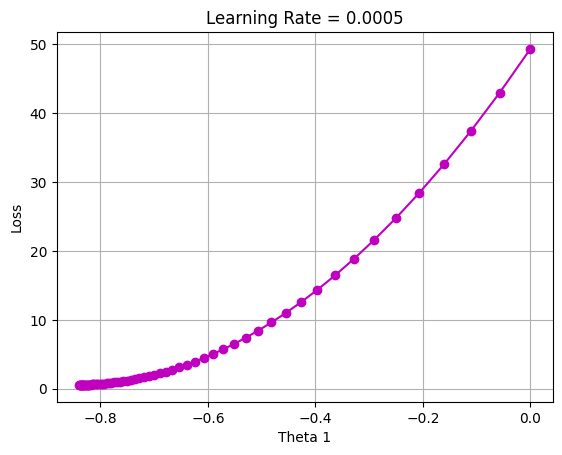

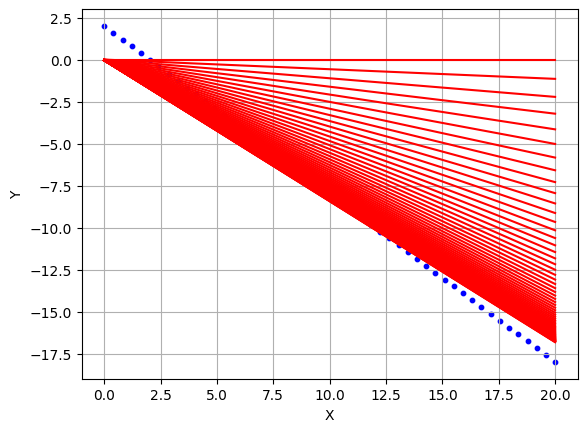

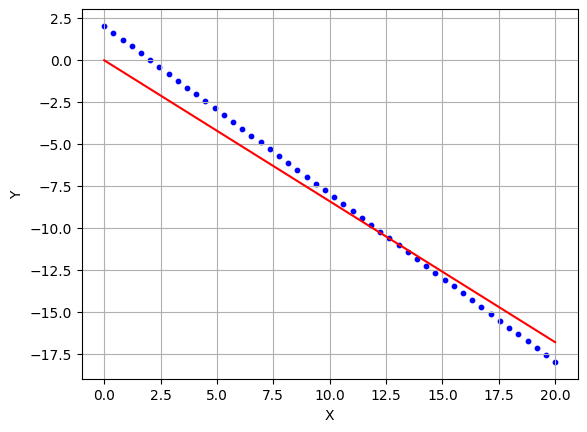

In [9]:
loss_plot(loss,'m')
theta_plot(thetas_0,loss,0,0.0005,'m')
theta_plot(thetas_1,loss,1,0.0005,'m')
converge_lines(X,y,h_xs,'b','r')
regression_line(X,y,h_x,'b','r')

### Update Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [10]:
def single_variable_MBGD(x,y,learning_rate,momentum_term,iterations):
    thetas_0 = []
    thetas_1 = []
    loss = []
    h_xs = []

    theta_0 = 0
    theta_1 = 0
    v_theta_0 = 0
    v_theta_1 = 0
    for i in range(iterations):
        h_x = theta_0 + theta_1 * x
        error = h_x - y
        j = 1/(2*len(x)) * np.sum(error**2)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        loss.append(j)
        h_xs.append(h_x)
        d_theta_0 = (1/len(x)) * np.sum(error)
        d_theta_1 = (1/len(x)) * np.sum(error * x)
        gradient_vector = np.array([[d_theta_0],[d_theta_1]])
        print("****************** Iteration ",i,"******************")
        print("h(x):",h_x,"\n")
        print("Error Vector:\n",error)
        print("j =",j,"\n")
        print("Gradient Vector:\n",gradient_vector,"\n")
        print("Gradiant Vector Norm:\n",np.linalg.norm(gradient_vector),"\n")
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)

        if (np.linalg.norm(gradient_vector) < 0.001 or abs(loss[i-1]-j) < 0.001) and i > 1 :
            print("****************** Training Report ******************\n")
            print("Gradient Descent converged after ",i," epochs\n")
            print("theta_0_Opt:",theta_0)
            print("theta_1_Opt:",theta_1,"\n")
            print("Error Vector:\n",error)
            print("Cost = ",j,"\n")
            print("h(x) = y_predict:\n",h_x,"\n")
            print("y_actual:",y,"\n")
            return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x
        v_theta_0 = momentum_term * v_theta_0 + learning_rate * d_theta_0
        v_theta_1 = momentum_term * v_theta_1 + learning_rate * d_theta_1
        theta_0 = theta_0 - v_theta_0
        theta_1 = theta_1 - v_theta_1
    return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x

#### Try function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [11]:
thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x =  single_variable_MBGD(X,y,0.0005,0.5,300)

****************** Iteration  0 ******************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
j = 49.34693877551021 

Gradient Vector:
 [[  8.        ]
 [114.69387755]] 

Gradiant Vector Norm:
 114.97254258164628 

theta_0_new: 0
theta_1_new: 0
************

In [12]:
print("r2_score:",r2_score(y,h_x))

r2_score: 0.9687892837396442


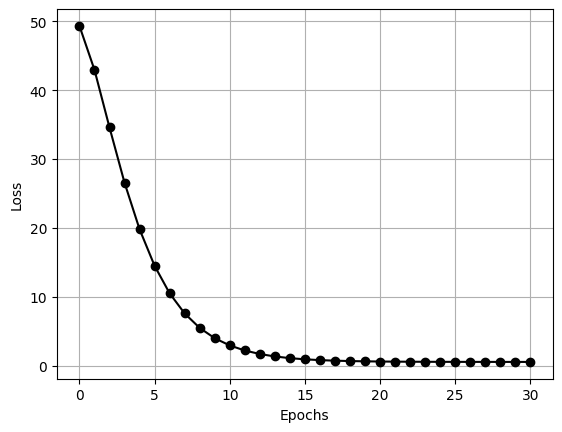

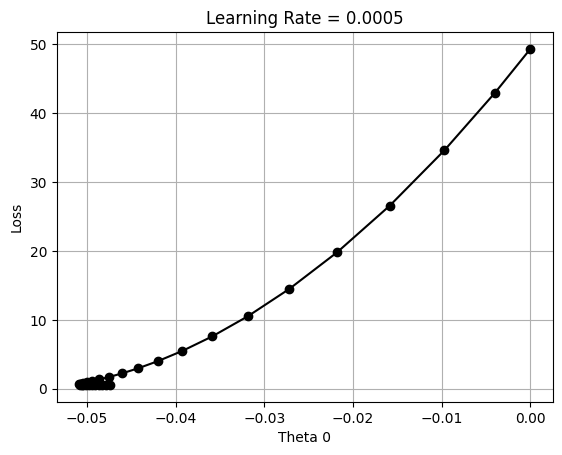

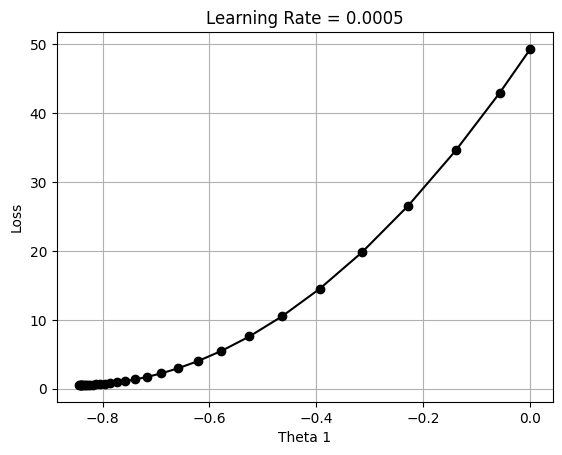

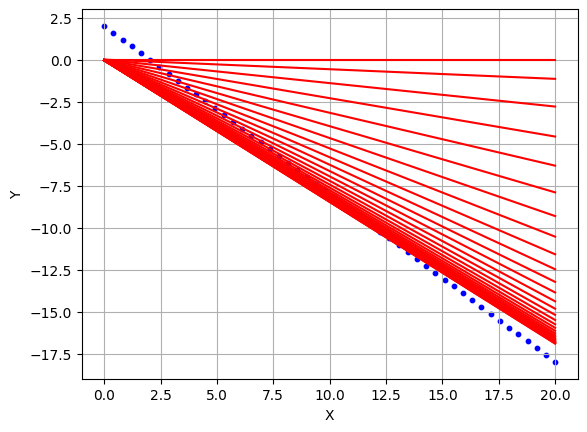

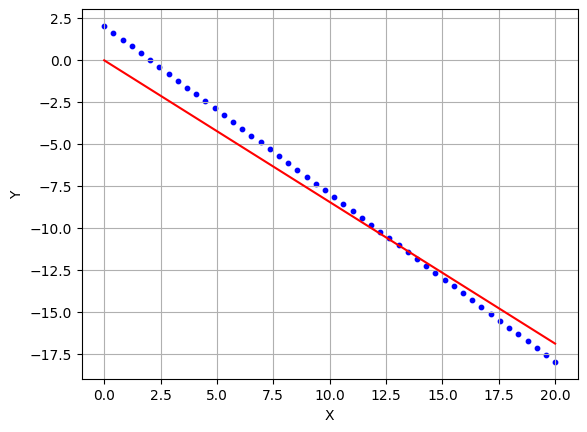

In [13]:
loss_plot(loss,'black')
theta_plot(thetas_0,loss,0,0.0005,'black')
theta_plot(thetas_1,loss,1,0.0005,'black')
converge_lines(X,y,h_xs,'b','r')
regression_line(X,y,h_x,'b','r')

### Update Batch GD for one variable  implementation to be NAG

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [20]:
def single_variable_NAG(x,y,learning_rate,momentum_term,iterations):
    thetas_0 = []
    thetas_1 = []
    loss = []
    h_xs = []

    theta_0 = 0
    theta_1 = 0
    v_theta_0 = 0
    v_theta_1 = 0
    for i in range(iterations):
        h_x = theta_0 + theta_1 * x
        error = h_x - y
        j = 1/(2*len(x)) * np.sum(error**2)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        loss.append(j)
        h_xs.append(h_x)
        d_theta_0 = (1/len(x)) * np.sum(error)
        d_theta_1 = (1/len(x)) * np.sum(error * x)
        gradient_vector = np.array([[d_theta_0],[d_theta_1]])
        print("****************** Iteration ",i,"******************")
        print("h(x):",h_x,"\n")
        print("Error Vector:\n",error)
        print("j =",j,"\n")
        print("Gradient Vector:\n",gradient_vector,"\n")
        print("Gradiant Vector Norm:\n",np.linalg.norm(gradient_vector),"\n")
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)

        if (np.linalg.norm(gradient_vector) < 0.001 or abs(loss[i-1]-j) < 0.001) and i > 0 :
            print("****************** Training Report ******************\n")
            print("Gradient Descent converged after ",i," epochs\n")
            print("theta_0_Opt:",theta_0)
            print("theta_1_Opt:",theta_1,"\n")
            print("Error Vector:\n",error)
            print("Cost = ",j,"\n")
            print("h(x) = y_predict:\n",h_x,"\n")
            print("y_actual:",y,"\n")
            return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x
        
        theta_temp_0 = theta_0 - momentum_term * v_theta_0
        theta_temp_1 = theta_1 - momentum_term * v_theta_1
        h_x_temp = theta_temp_0 + theta_temp_1 * x
        d_theta_0_temp = (1/len(x)) * np.sum(h_x_temp - y)
        d_theta_1_temp = (1/len(x)) * np.sum((h_x_temp - y) * x)
        v_theta_0 = momentum_term * v_theta_0 + learning_rate * d_theta_0_temp
        v_theta_1 = momentum_term * v_theta_1 + learning_rate * d_theta_1_temp
        theta_0 = theta_temp_0 - learning_rate * d_theta_0_temp
        theta_1 = theta_temp_1 - learning_rate * d_theta_1_temp
    return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [45]:
thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x =  single_variable_NAG(X,y,0.0005,0.9,300)

****************** Iteration  0 ******************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
j = 49.34693877551021 

Gradient Vector:
 [[  8.        ]
 [114.69387755]] 

Gradiant Vector Norm:
 114.97254258164628 

theta_0_new: 0
theta_1_new: 0
************

In [46]:
print("r2_score:",r2_score(y,h_x))

r2_score: 0.971103130756324


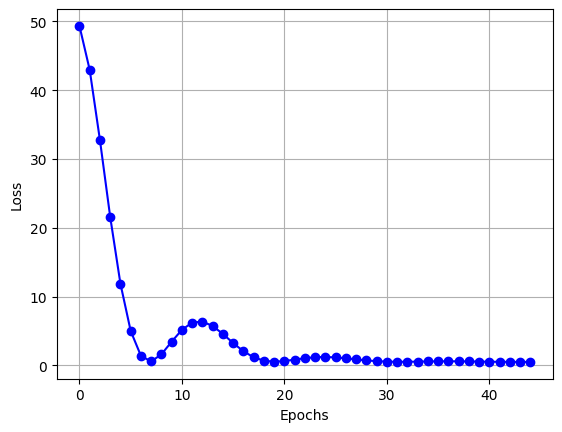

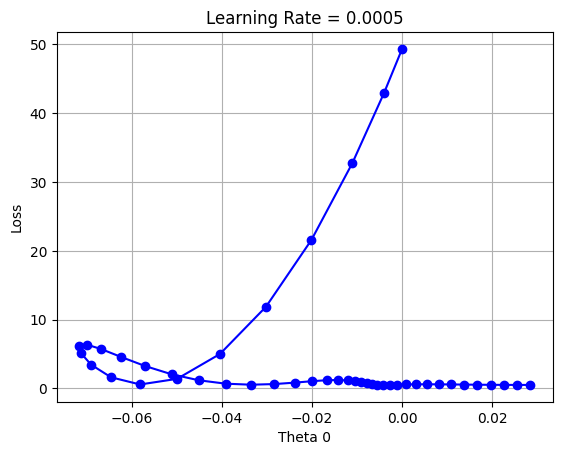

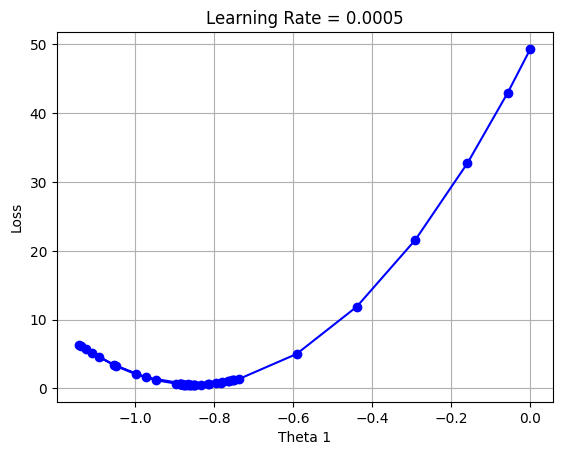

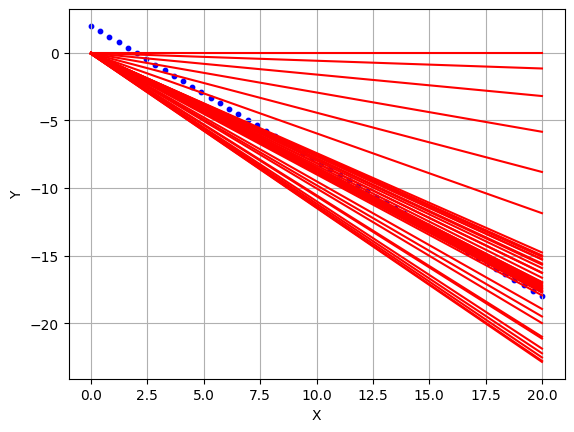

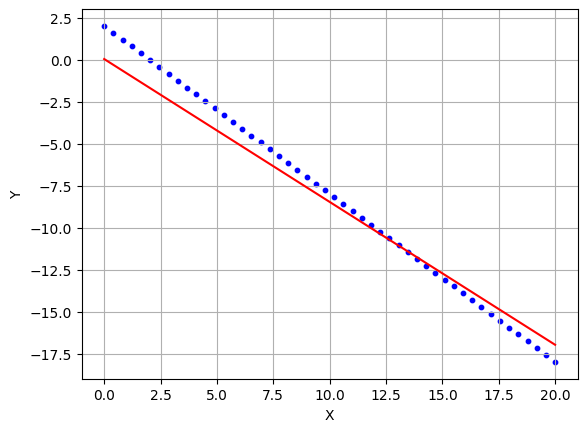

In [47]:
loss_plot(loss,'b')
theta_plot(thetas_0,loss,0,0.0005,'b')
theta_plot(thetas_1,loss,1,0.0005,'b')
converge_lines(X,y,h_xs,'b','r')
regression_line(X,y,h_x,'b','r')